In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np


from src.exp.exp_stime.data_hypparams import FLUX_RESULT_LINKS, FLUX_NODES, FLUX_MAINYEAR, FLUX_LOC_INFO_OURS_PATH, \
    FLUX_LOC_INFO_KRICH_PATH

from tigramite.toymodels import structural_causal_processes as toys
import tigramite.plotting as tp
from matplotlib import pyplot as plt

from src.exp.exp_stime.data_preproc import get_flux_data


Detecting 1 CUDA device(s).


In [2]:
dinfo = get_flux_data()

INFO:SPCTME-flux:0: AT-Neu (2002–2012), main 2006/2007
INFO:SPCTME-flux:1: AU-DaS (2008–2014), main 2008/2009
INFO:SPCTME-flux:2: AU-How (2001–2014), main 2006/2007
INFO:SPCTME-flux:3: AU-Tum (2001–2014), main 2006/2007
INFO:SPCTME-flux:4: BE-Bra (1996–2014), main 2006/2007
INFO:SPCTME-flux:5: BE-Lon (2004–2014), main 2006/2007
INFO:SPCTME-flux:6: BE-Vie (1996–2014), main 2006/2007
INFO:SPCTME-flux:7: CA-Qfo (2003–2010), main 2006/2007
INFO:SPCTME-flux:8: CH-Cha (2005–2014), main 2006/2007
INFO:SPCTME-flux:9: CH-Dav (1997–2014), main 2006/2007
INFO:SPCTME-flux:10: CH-Fru (2005–2014), main 2006/2007
INFO:SPCTME-flux:11: CH-Lae (2004–2014), main 2006/2007
INFO:SPCTME-flux:12: CH-Oe1 (2002–2008), main 2006/2007
INFO:SPCTME-flux:13: CZ-BK1 (2004–2014), main 2006/2007
INFO:SPCTME-flux:14: CZ-BK2 (2004–2012), main 2006/2007
INFO:SPCTME-flux:15: DE-Geb (2001–2014), main 2006/2007
INFO:SPCTME-flux:16: DE-Gri (2004–2014), main 2006/2007
INFO:SPCTME-flux:17: DE-Hai (2000–2012), main 2006/2007
IN

In [ ]:
links = FLUX_RESULT_LINKS
n_n = len(FLUX_NODES)
nodes = FLUX_NODES
for node in range(n_n):
    for (pa, lg), _, _ in links[node]: print(f"{ n_n * np.abs(lg) + pa}, {node}: { nodes[node]}-> { nodes[pa]}")

main_yr = FLUX_MAINYEAR
loc_id_file = FLUX_LOC_INFO_OURS_PATH
info_file =  FLUX_LOC_INFO_KRICH_PATH

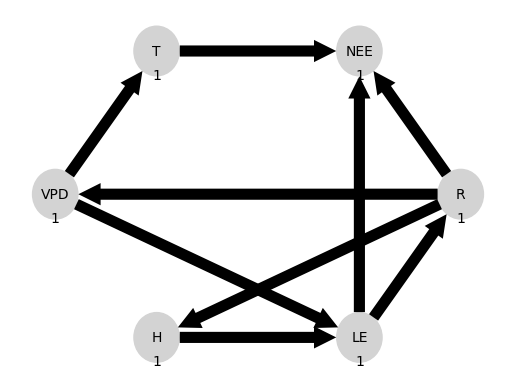

In [4]:
gt_graph = toys.links_to_graph({n: [((i, -l), v, f) for  ((i,l),v,f) in links[n]] for n in links}, tau_max=2)
var_names = FLUX_NODES
tp.plot_graph(
    graph=gt_graph,
    var_names=var_names,
    show_autodependency_lags=True
    ); plt.show()